In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_hdf('../input/train.h5')
train.head()

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,1.0,NaN,NaN,NaN,1,NaN,104,6.0,9.0,18,1438873,2019-06-07 15:32:01,8,2135019403,0,2329670524,601
1,135939,893,NaN,NaN,NaN,NaN,1,NaN,19,6.0,8.0,0,1185582,2019-06-08 19:40:40,4,2782306428,1,2864801071,1000
2,399254,821,NaN,760.0,NaN,360.0,1,NaN,559,NaN,8.0,0,1555716,2019-06-06 23:59:13,0,1392806005,2,628911675,696
3,68983,1004,1.0,2214.0,NaN,1080.0,0,NaN,129,2.0,8.0,0,1093419,2019-06-09 09:00:12,0,3562553457,3,1283809327,753
4,288999,1076,1.0,2280.0,NaN,1080.0,1,1.0,64,2.0,8.0,0,1400089,2019-06-07 08:28:13,5,2364522023,4,1510695983,582


In [3]:
test1 = pd.read_hdf('../input/test1.h5')
test1.head()

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,1.0,2196.0,2.0,1080.0,1.0,639,2.0,8.0,188,1440682,2019-06-07 09:42:30,7,1672223856,57,3872258917,658
1,435108,944,3.0,2280.0,3.0,1080.0,1.0,704,6.0,8.0,221,1606824,2019-06-05 20:53:56,3,3767901757,23,129322164,943
2,0,1106,1.0,NaN,NaN,NaN,NaN,39,2.0,5.0,1562,1774642,2019-06-04 10:07:42,0,454638703,30,4226678391,411
3,451504,761,1.0,1344.0,NaN,720.0,NaN,54,2.0,7.0,9,1742535,2019-06-05 01:03:22,0,1507622951,65,3355419572,848
4,0,1001,1.0,665.0,NaN,320.0,1.0,29,5.0,8.0,4,1689686,2019-06-05 08:15:54,0,4116351093,148,2644467751,411


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 19 columns):
android_id    500000 non-null object
apptype       500000 non-null int16
carrier       435093 non-null float64
dev_height    392986 non-null float16
dev_ppi       116709 non-null float16
dev_width     392989 non-null float16
label         500000 non-null int8
lan           316720 non-null float64
media_id      500000 non-null object
ntt           479383 non-null float16
osv           493439 non-null float64
package       500000 non-null object
sid           500000 non-null object
timestamp     500000 non-null object
version       500000 non-null int64
fea_hash      500000 non-null object
location      500000 non-null int16
fea1_hash     500000 non-null int64
cus_type      500000 non-null int16
dtypes: float16(4), float64(3), int16(3), int64(2), int8(1), object(6)
memory usage: 52.9+ MB


In [6]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 18 columns):
android_id    150000 non-null object
apptype       150000 non-null int16
carrier       130481 non-null float64
dev_height    117801 non-null float16
dev_ppi       34667 non-null float16
dev_width     117801 non-null float16
lan           94451 non-null float64
media_id      150000 non-null object
ntt           143818 non-null float16
osv           148007 non-null float64
package       150000 non-null object
sid           150000 non-null object
timestamp     150000 non-null object
version       150000 non-null int64
fea_hash      150000 non-null object
location      150000 non-null int16
fea1_hash     150000 non-null int64
cus_type      150000 non-null int16
dtypes: float16(4), float64(3), int16(3), int64(2), object(6)
memory usage: 15.7+ MB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
apptype,500000.0,9.866401e+02,1.289563e+02,95.0,9.170000e+02,1.001000e+03,1.076000e+03,1.241000e+03
carrier,435093.0,1.248172e+00,5.788177e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
dev_height,392986.0,NaN,NaN,7.0,9.600000e+02,1.920000e+03,2.160000e+03,9.024000e+03
dev_ppi,116709.0,NaN,NaN,1.0,3.000000e+00,4.800000e+02,4.800000e+02,7.200000e+02
dev_width,392989.0,NaN,NaN,200.0,7.200000e+02,1.080000e+03,1.080000e+03,8.832000e+03
label,500000.0,4.844800e-01,4.997596e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
lan,316720.0,1.002103e+00,1.021771e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
ntt,479383.0,NaN,0.000000e+00,1.0,2.000000e+00,2.000000e+00,5.000000e+00,7.000000e+00
osv,493439.0,7.386627e+00,1.435964e+00,1.0,6.000000e+00,8.000000e+00,8.000000e+00,1.100000e+01
version,500000.0,2.228790e+00,3.046110e+00,0.0,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01


In [7]:
test1.describe().T

,count,mean,std,min,25%,50%,75%,max
apptype,150000.0,9.859133e+02,1.291269e+02,95.0,9.170000e+02,1.001000e+03,1.076000e+03,1.241000e+03
carrier,130481.0,1.249055e+00,5.794975e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
dev_height,117801.0,NaN,NaN,1.0,9.600000e+02,1.920000e+03,2.160000e+03,8.512000e+03
dev_ppi,34667.0,inf,inf,1.0,3.000000e+00,4.800000e+02,4.800000e+02,6.400000e+02
dev_width,117801.0,NaN,NaN,50.0,7.200000e+02,1.080000e+03,1.080000e+03,9.024000e+03
lan,94451.0,1.002488e+00,1.149684e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
ntt,143818.0,NaN,0.000000e+00,2.0,2.000000e+00,2.000000e+00,5.000000e+00,7.000000e+00
osv,148007.0,7.385583e+00,1.437236e+00,2.0,6.000000e+00,8.000000e+00,8.000000e+00,1.100000e+01
version,150000.0,2.215973e+00,3.047393e+00,0.0,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01
location,150000.0,9.612893e+01,8.554042e+01,-1.0,2.300000e+01,6.400000e+01,1.550000e+02,3.300000e+02


id_feat = ['sid', 'android_id', 'media_id']

categorical_feat = ['carrier', 'apptype', 'lan', 'ntt', 'osv', 'package', 'version', 'fea_hash', 'fea1_hash', 'location', 'cus_type']

numeric_feat = ['dev_height', 'dev_width', 'dev_ppi']

time_feat = ['timestamp']

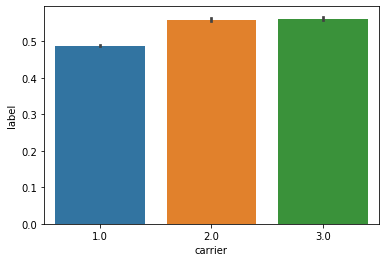

In [11]:
sns.barplot(x='carrier', y='label',
            data=train)

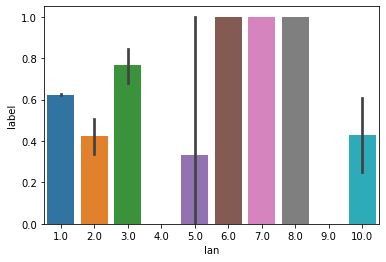

In [12]:
sns.barplot(x='lan', y='label',
            data=train)